In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf 
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
salary_data=pd.read_csv("Salary_Data.csv")
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


{'whiskers': [<matplotlib.lines.Line2D at 0x123ab3b6eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x123ab3d05b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x123ab3b6b50>],
 'medians': [<matplotlib.lines.Line2D at 0x123ab3d0c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x123ab3d0fd0>],
 'means': []}

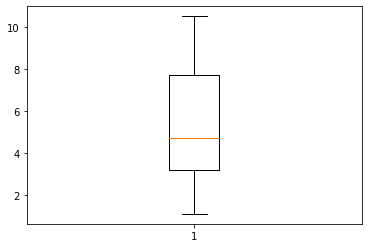

In [3]:
plt.boxplot(salary_data["YearsExperience"])

{'whiskers': [<matplotlib.lines.Line2D at 0x123ab49e9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x123ab4ad0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x123ab49e640>],
 'medians': [<matplotlib.lines.Line2D at 0x123ab4ad760>],
 'fliers': [<matplotlib.lines.Line2D at 0x123ab4adac0>],
 'means': []}

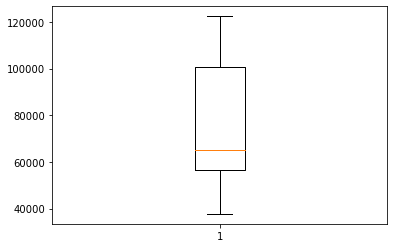

In [4]:
plt.boxplot(salary_data["Salary"])

C:\Users\suhas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

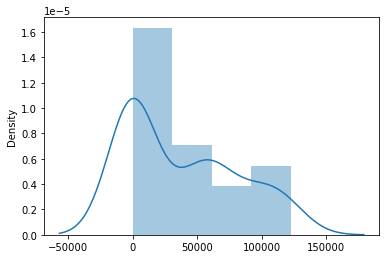

In [5]:
sns.distplot(salary_data)

C:\Users\suhas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

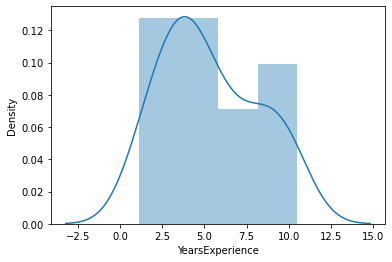

In [6]:
sns.distplot(salary_data["YearsExperience"])

C:\Users\suhas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

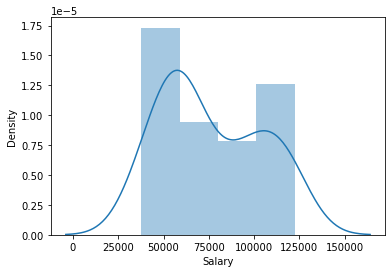

In [7]:
sns.distplot(salary_data["Salary"])

In [8]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [9]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [10]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [11]:
salary_data.duplicated().sum()

0

In [12]:
# model1
model1=smf.ols("Salary~YearsExperience",data=salary_data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 27 Jul 2021   Prob (F-statistic):           1.14e-20
Time:                        18:08:12   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
predict1=model1.predict(salary_data["YearsExperience"])
rmse_1=np.sqrt(np.mean((np.array(salary_data["Salary"])-np.array(predict1))**2))

In [14]:
rmse_1

5592.043608760662

# Conclusion:
### RMSE value is giving less value compared to original value. Hence, it is a good model.